# Two Agent Copilot<br/>with Agent Proxy

This is a sample of two Assistants being used as agents in a complex Copilot solution.

Agents:
- **Sales Agent:** It is implemented with an Assistants API that can perform calculations and can provide the user information customer, sellers, customer orders, and inventory.
- **Trading Agent:** It is implemented with an Assistant API with function calling and code interpreter to get the latest stock prices and can provide the user with up to date prices and perform portfolio calculations.

Coordination:
- **Agent Proxy:** This agent coordinates which agent to call depending on user's intent.

Possible messages handling options:
1. No handling: a la LLM model
2. Manual handling: user write logic to coordinate messages between two agent
3. Hybrid: One agent keeps state the other just used as LLM

Diagram:

![Two agent Assistant Diagram](../images/proxy-two-agent-diagram.png)

### Load the required libraries

In [1]:
import sales_agent
import trading_agent
from AgentProxy import AgentProxy
from AgentRegistration import AgentRegistration
from AgentSettings import AgentSettings
from openai import AzureOpenAI

### Load the environment variables

In [2]:
settings = AgentSettings()

In [3]:
client = AzureOpenAI(api_key=settings.api_key,
        api_version=settings.api_version,
        azure_endpoint=settings.api_endpoint)

### Create the AzureOpenAI client

In [4]:
trading_agent = trading_agent.get_agent(settings,client)

In [5]:
sales_agent = sales_agent.get_agent(settings,client)

data/sales/sellers.csv
data/sales/customers.csv
data/sales/orders.csv
data/sales/inventory.csv


In [6]:
reg_sales = AgentRegistration(settings, client, "SalesIntent","questions or operations related to calculations, customers, sales, orders, inventory, items, and sellers.",sales_agent)

In [7]:
reg_trading = AgentRegistration(settings, client, "TradingIntent","questions or operations related to trading, stocks, investments, and financial markets.",trading_agent)

In [8]:
proxy = AgentProxy(settings, client, [reg_sales, reg_trading])

### Have a conversation with the Assistant

In [9]:
proxy.process_for_intent("Suzan", "user_123", "What is the speed of light?")

The speed of light in a vacuum is exactly 299,792,458 meters per second (about 186,282 miles per second). This constant is symbolized as "c" and is one of the fundamental constants of nature. It is also the upper limit for the speed at which energy, matter, and information can travel, according to the theory of relativity put forth by Albert Einstein. The speed of light plays a crucial role in the structure of the theories of both special and general relativity. It is also important in various fields of physics and has implications for our understanding of the universe.


processing ...
user: John:
Chart the products sold by State?

assistant:
To create a chart displaying the products sold by state, I will first need to examine the contents of the files you have uploaded to determine which file contains the relevant data for creating such a chart. Let me check the contents of each file and I will proceed with creating the chart.

assistant:
The contents of the files indicate that:

- File indexed as 0 contains seller information with their state.
- File indexed as 1 contains customer information with their state.
- File indexed as 2 contains order information, which associates customer IDs and seller IDs with item IDs and quantities.
- File indexed as 3 contains item descriptions.

To chart the products sold by state, we will need to combine data from these files to associate items with states based on the orders. Since the data about states is related to customers and sellers, and it's not clear whether we should chart based on the state of the custome

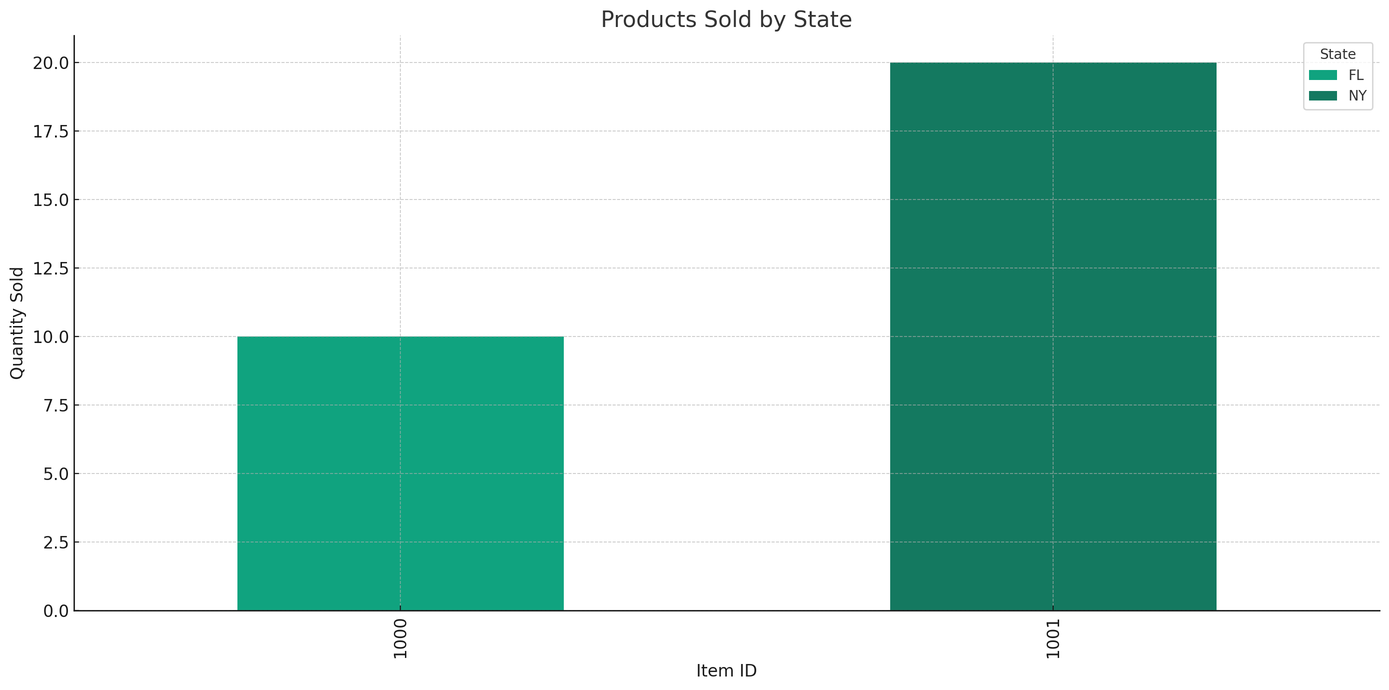

assistant:
The chart representing the products sold by state has been created. Each bar represents an item, and the stacked segments represent the quantity sold in different states.

Do you have any further questions?

Deleted thread:  thread_n14epOYYG6umpHxpuurctNW8


In [10]:
proxy.process_for_intent("John", "user_123", "Chart the products sold by State?")

In [ ]:
proxy.process_for_intent("John", "user_123", "What is the current MSFT price?")

### Cleanup

In [11]:
sales_agent.cleanup()
trading_agent.cleanup()

AssistantDeleted(id='asst_mJsEgvIvfCOnDA7up4lpSijQ', deleted=True, object='assistant.deleted')
Deleting:  0  threads.
Deleting:  4  files.
FileDeleted(id='assistant-t5I52Rgm2s9PoA1Jq0XD9mNy', deleted=True, object='file')
FileDeleted(id='assistant-ZqvxyXnYLN8AEYV0DPn7tHqM', deleted=True, object='file')
FileDeleted(id='assistant-TBoqTh41zfkHW3gpoQH4qcrp', deleted=True, object='file')
FileDeleted(id='assistant-QsM4Zv6pRWx9Y3BVt0YLYnma', deleted=True, object='file')
AssistantDeleted(id='asst_MECTN9rUhlOt8whywWEPAoo2', deleted=True, object='assistant.deleted')
Deleting:  0  threads.
Deleting:  0  files.
